In [1]:
import pandas as pd

In [2]:
def exract(data_path, metadata_path):
    df = pd.read_csv(data_path, header=[0,1])
    meta = pd.read_csv(metadata_path, sep = ' ', header=None)
    dates = ['year','month','day','hour','day_of_week','holiday','day_of_year']
    df.columns = dates+list(meta[2])
    df = df.set_index(dates)
    return df

In [3]:
df10= exract('data/Data_PM10.csv', 'data/MetaData_PM10.txt')
df25 = exract('data/Data_PM25.csv', 'data/MetaData_PM25.txt')
dfBP = exract('data/Data_BP.csv', 'data/MetaData_BP.txt')
dfRH = exract('data/Data_RH.csv', 'data/MetaData_RH.txt')
# dfWD = exract('data/Data_WD.csv', 'data/MetaData_WD.txt')
# dfTemp = exract('data/Data_Temp.csv', 'data/MetaData_Temp.txt')
# dfRain = exract('data/Data_Rain.csv', 'data/MetaData_Rain.txt')
# dfSR = exract('data/Data_SR.csv', 'data/MetaData_SR.txt')

# dfWD

In [4]:
dates = ['year','month','day','hour','day_of_week','holiday','day_of_year']
c= 0
all_checks_df = pd.DataFrame()
for i in df10.columns[7:]:
    if i in df25.columns and i in dfBP.columns and i in dfRH.columns:
        df10_per_station = df10[[i]]
        df10_per_station.columns = ['PM10']
        df25_per_station = df25[[i]]
        df25_per_station.columns = ['PM25']
        # dfBH_per_station = dfBH[[i]]
        dfBP_per_station = dfBP[[i]]
        dfBP_per_station.columns = ['BP']
        dfRH_per_station = dfRH[[i]]
        dfRH_per_station.columns = ['RH']
        df_per_station = df10_per_station.join(df25_per_station, how = 'inner', lsuffix='_PM10', rsuffix='_PM25').join(dfBP_per_station, how = 'inner', lsuffix='_PM1025BH', rsuffix='_BP').join(dfRH_per_station, how = 'inner', lsuffix='_PM1025BH', rsuffix='_RH').dropna()
        df_per_station['station'] = [i]*len(df_per_station.index)
        df_per_station.set_index(['station'])
        all_checks_df=pd.concat([all_checks_df,df_per_station])
all_checks_df



PM10  PM25      BP    RH  \
year month day hour day_of_week holiday day_of_year                             
2015 1     1   0.5  5           0       1            29.5  28.5  1018.4  54.1   
               1.0  5           0       1            21.2  20.9  1018.1  51.2   
               1.5  5           0       1            23.5  22.9  1018.1  49.6   
               2.0  5           0       1            22.8  22.4  1017.7  50.8   
               2.5  5           0       1            26.7  25.6  1017.7  55.4   
...                                                   ...   ...     ...   ...   
     12    31  18.0 5           0       365          15.2   4.0  1009.0  78.1   
               18.5 5           0       365          45.6  11.4  1009.3  77.9   
               19.0 5           0       365          37.6   6.8  1009.5  87.2   
               19.5 5           0       365          13.8   4.6  1009.5  92.0   
               20.0 5           0       365          10.4   3.0  1009.3  94.0   

                                                    station  
year month day hour day_of_week holiday day_of_year          
2015 1     1   0.5  5           0       1               ATA  
               1.0  5           0       1               ATA  
               1.5  5           0       1               ATA  
               2.0  5           0       1               ATA  
               2.5  5           0       1               ATA  
...                                                     ...  
     12    31  18.0 5           0       365             NES  
               18.5 5           0       365             NES  
               19.0 5           0       365             NES  
               19.5 5           0       365             NES  
               20.0 5           0       365             NES  

[33571 rows x 5 columns]

In [5]:
def model_per_rows_number(examples_df, n:int):
    df = examples_df.sample(n=n)
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error, r2_score
    from sklearn.model_selection import train_test_split
    forest_model = RandomForestRegressor(random_state=1)
    X = df[['PM10','BP','RH']]
    y = df.PM25
    train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
    forest_model.fit(train_X, train_y.to_numpy())
    melb_preds = forest_model.predict(val_X)
    mae = mean_absolute_error(val_y.to_numpy().reshape(-1,1), melb_preds)
    r2 = r2_score(val_y, melb_preds)
    return forest_model, mae, r2


In [8]:
model = model_per_rows_number(all_checks_df, 33000)

<Axes: xlabel='PM10', ylabel='PM25'>

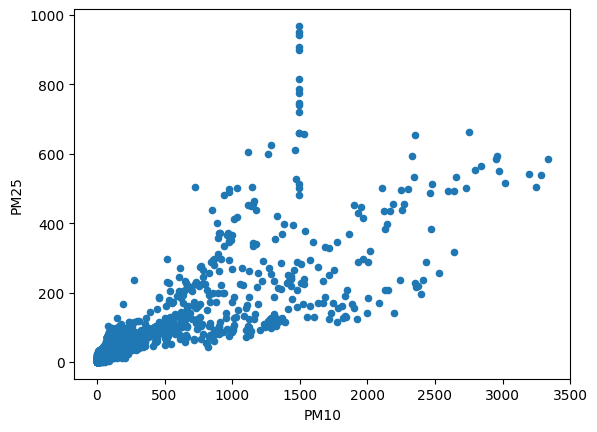

In [9]:
all_checks_df.plot.scatter(x='PM10', y='PM25')

In [10]:
import pickle

filename = "/home/dov-wachtfogel/PycharmProjects/MigdalDavid/PM10_RH_BP_to_PM25_model.pickle"

# save model
pickle.dump(model, open(filename, "wb"))


In [4]:
all_checks_df = pd.read_csv('all_PM10_PM25.csv', header=[0], index_col=[0,1,2,3,4,5,6])
all_checks_df

PM10  PM25
year month day hour day_of_week holiday day_of_year            
2001 1     4   9.0  5           0       4            85.0  40.0
               9.5  5           0       4            66.0  31.0
               10.0 5           0       4            50.0  23.0
               10.5 5           0       4            52.0  32.0
               11.0 5           0       4            63.0  33.0
...                                                   ...   ...
2015 12    31  20.5 5           0       365           3.4   1.7
               21.0 5           0       365           6.2   8.1
               21.5 5           0       365          16.3  13.1
               22.5 5           0       365          11.7   6.6
               23.0 5           0       365          12.9  19.3

[2573901 rows x 2 columns]